<a href="https://colab.research.google.com/github/sumeet6510/Customer-Segmentation/blob/main/Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



# Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Sumeet Agrawal - Customer Segmentation (Capstone Project 4)/Data/Online Retail.xlsx')

In [7]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
data.shape

(541909, 8)

In [11]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

# EDA

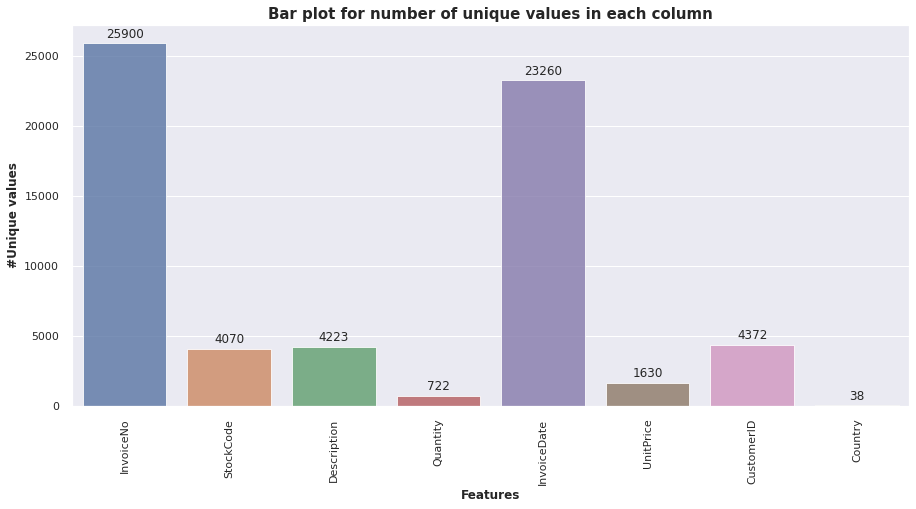

In [63]:
unique_df=pd.DataFrame()
unique_df['Features']=data.columns
unique=[]
for i in data.columns:
  unique.append(data[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

## Dropping Duplicates

In [65]:
df = data.copy()

Before diving into insights from the data, duplicate entries were removed from the data.

In [66]:
# dropping ALL duplicte values
df.drop_duplicates(keep = False, inplace = True)

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [68]:
data.shape

(541909, 8)

In [69]:
df.shape

(531762, 8)

After **dropping duplicates** we can see that **10147 values** got dropoed which is nearly about 2%

## country count on the basis of Invoce no.

In [70]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [71]:
country_count.head()

,Country,InvoiceNo
0,Australia,1257
1,Austria,401
2,Bahrain,19
3,Belgium,2069
4,Brazil,32


In [72]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_ten_country

,Country,InvoiceNo
0,United Kingdom,485509
1,Germany,9465
2,France,8525
3,EIRE,8172
4,Spain,2523
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1986
8,Portugal,1502
9,Australia,1257


In [73]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/df['InvoiceNo'].count()

In [74]:
Top_ten_country

,Country,InvoiceNo,Country_percent
0,United Kingdom,485509,91.301936
1,Germany,9465,1.779932
2,France,8525,1.603161
3,EIRE,8172,1.536778
4,Spain,2523,0.474460
5,Netherlands,2371,0.445876
6,Belgium,2069,0.389084
7,Switzerland,1986,0.373475
8,Portugal,1502,0.282457
9,Australia,1257,0.236384


Plotting graph for top 10 countries

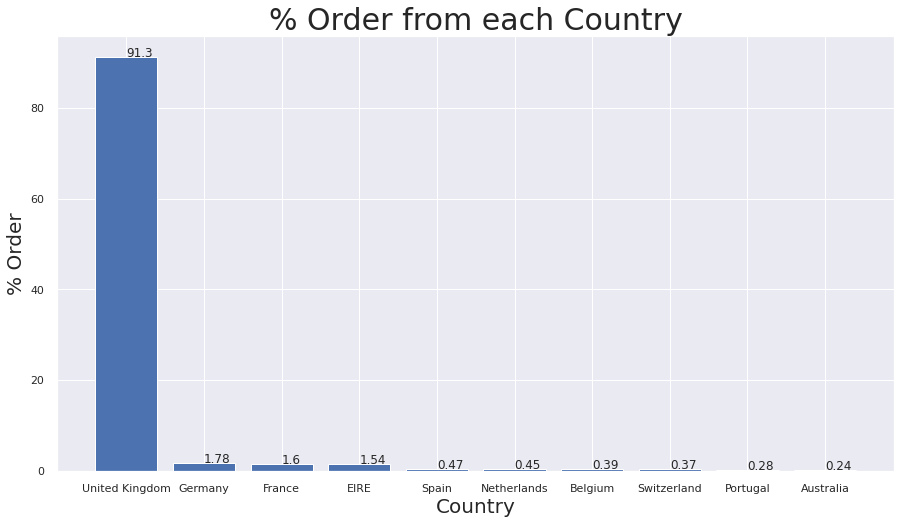

In [75]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()


## checking for cancelled orders

Given in descripton

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation**.

Let us now look at the number of canceled orders in the data.

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [77]:
# String to be searched in start of string 
search ="C"
  
# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [78]:
cancel_order.shape

(9219, 8)

In [79]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

1.7336703261985624

This shows that **9219 (approx 1.73%)** were such orders which was **cancelled**.

In [80]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [81]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7791
1,Germany,453
2,EIRE,300
3,France,147
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


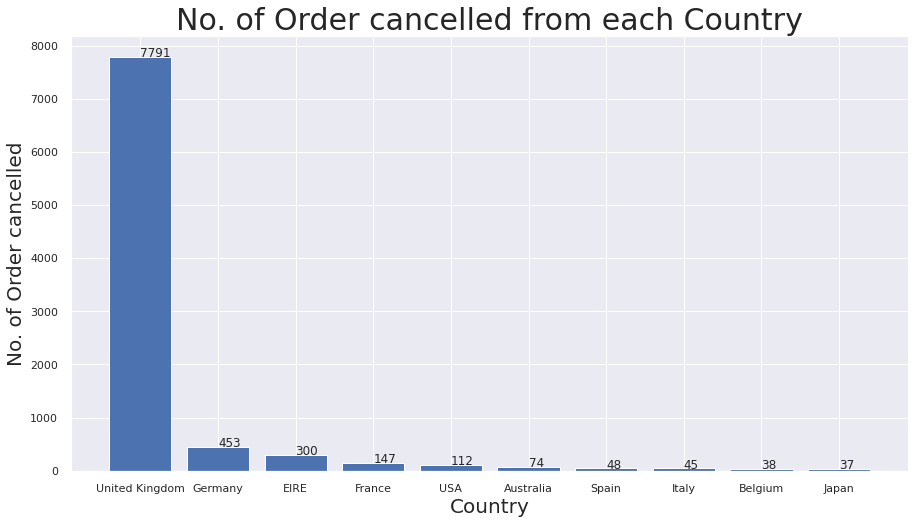

In [82]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [83]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

In [84]:
df.shape

(522543, 8)

## Customer's data

In [85]:
cs_df = df.copy()

In [86]:
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice

In [87]:
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [88]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = cs_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)

,CustomerID,amount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194230.79
3,16446.0,168472.50
4,14911.0,143597.28
5,12415.0,124914.53
6,14156.0,117040.53
7,17511.0,91062.38
8,16029.0,80676.84
9,12346.0,77183.60


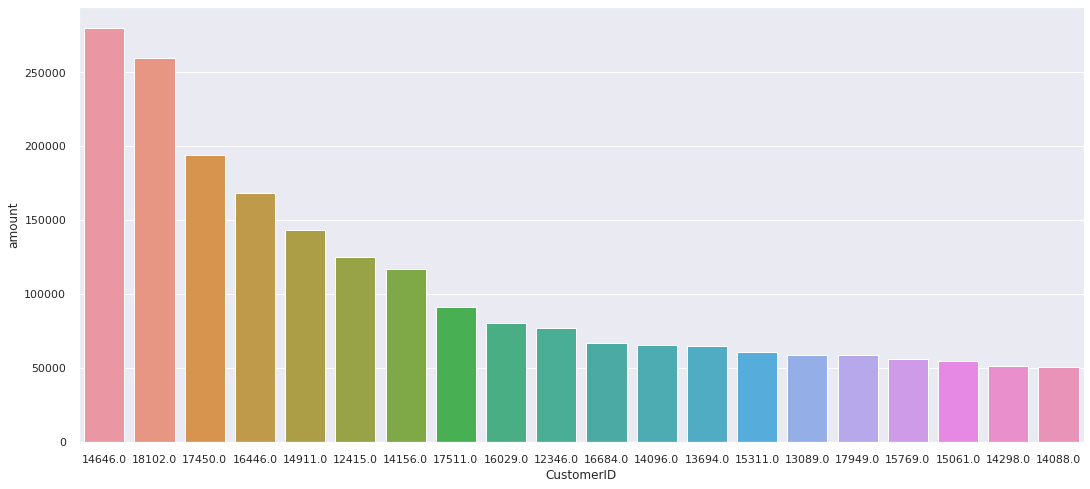

In [89]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])


## Top products

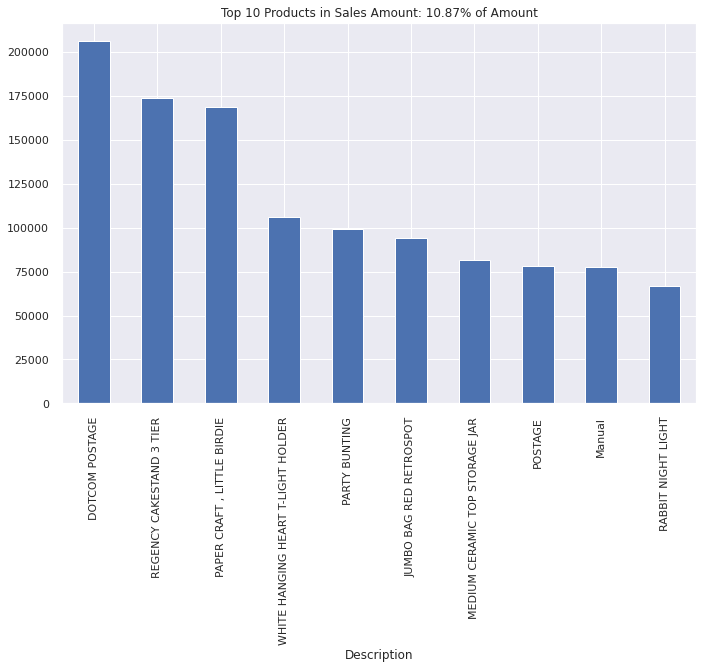

In [90]:
AmoutSum = cs_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = cs_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

## Checking orders with negative quantities that were not canceled.

In [91]:
df_negative_qty = df[df['Quantity'] < 0]
df_negative_qty.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom


As we can see from the above figure, these cases are the ones where CustomerID values are NaNs. These cases were also removed from the data.

In [92]:
df_negative_qty.shape

(1336, 8)

So, there is 1336 rows having negative quantity and also order were not canceled.

Also we see that, these cases are the ones where CustomerID values are NaNs. These cases were also removed from the data.

In [93]:
df = df[df['Quantity'] > 0]

In [94]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [95]:
df.shape

(521207, 8)

In [96]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133284
Country             0
dtype: int64

Customer ID has **133284** Nan Values. And Description has **592** Nan Values. Drop the Nan values to make data more cleaned.

In [97]:
df.dropna(inplace=True)

In [98]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [99]:
df.shape

(387923, 8)

In [100]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [101]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,387923.000000,387923.00000,387923.000000
mean,13.278617,3.13463,15281.620997
std,182.690206,22.37660,1713.954340
min,1.000000,0.00000,12346.000000
25%,2.000000,1.25000,13941.000000
50%,6.000000,1.95000,15144.000000
75%,12.000000,3.75000,16788.000000
max,80995.000000,8142.75000,18287.000000


# RFM model (Recency, Frequency,Monetary value)

**Recency**

To create a Recency feature variable, we need to decide the reference date for analysis and we wil define the reference date as one day before the last transaction.

In [135]:
reference_date = df.InvoiceDate.max()

#timedelta function returns to total number of seconds
reference_date = reference_date + datetime.timedelta(days=1)

print(df.InvoiceDate.max(), df.InvoiceDate.min())
reference_date

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

We will construct a reference variable as number of days before the reference date when a customer last made a purchase.

In [136]:
df['days_since_last_purchase'] = reference_date- df.InvoiceDate
df['days_since_last_purchase_num'] = df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head() 

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [137]:
rfm_df = df.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
rfm_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
rfm_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


In [138]:
rfm_df.describe()

,CustomerID,Recency
count,4339.000000,4339.000000
mean,15299.936852,92.518322
std,1721.889758,100.009747
min,12346.000000,1.000000
25%,13812.500000,18.000000
50%,15299.000000,51.000000
75%,16778.500000,142.000000
max,18287.000000,374.000000


**Frequency and Monetary value**

In [139]:
df['Monetary'] = df['Quantity']*df['UnitPrice']

In [140]:
customer_monetary_val = df[['CustomerID','Monetary']].groupby('CustomerID').sum().reset_index()
customer_monetary_val.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [141]:
## Merging rfm_df and customer_monetary_val
rfm_df=rfm_df.merge(customer_monetary_val,how='outer')
rfm_df.head()

,CustomerID,Recency,Monetary
0,12346.0,326.0,77183.60
1,12347.0,2.0,4310.00
2,12348.0,75.0,1797.24
3,12349.0,19.0,1757.55
4,12350.0,310.0,334.40


In [142]:
customer_freq = df[['CustomerID','Monetary']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Monetary':'Frequency'},inplace=True)
customer_freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [143]:
# Merging rfm_df and customer_freq dataframe
rfm_df = rfm_df.merge(customer_freq,how='outer')
rfm_df.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,77183.60,1
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17


In [144]:
# Looking is there any value less than zero present or not?
rfm_df.Monetary[rfm_df.Monetary<=0].count()

1

In [145]:
# Removing that value which is less than 0
rfm_df = rfm_df[rfm_df.Monetary != 0]

# Data Preprocessing


Once we have created our customer value dataset, we will perform some preprocessing on the data. For our clustering, we will be using the K-means clustering algorithm. One of the requirements for proper functioning of the algorithm is the mean centering of the variable values. Mean centering of a variable value means that we will replace the actual value of the variable with a standardized value, so that the variable has a mean of 0 and variance of 1. This ensures that all the variables are in the same range and the difference in ranges of values doesn't cause the algorithm to not perform well. This is akin to feature scaling.

Another problem that you can investigate about is the huge range of values each variable can take. This problem is particularly noticeable for the monetary amount variable. To take care of this problem, we will transform all the variables on the log scale. This transformation, along with the standardization, will ensure that the input to our algorithm is a homogenous set of scaled and transformed values.

## Distribution Plot

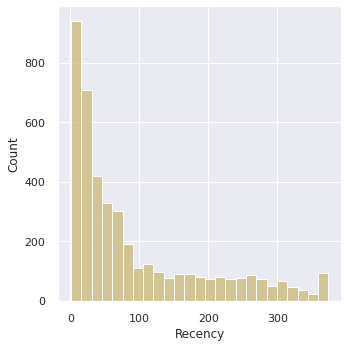

In [146]:
## Recency Distribution Plot
x_R = rfm_df['Recency']
ax_R = sns.displot(x_R, color='y')

In [147]:
## Descriptive analysis Frequency 
rfm_df.Frequency.describe()

count    4338.000000
mean       89.424159
std       222.596454
min         1.000000
25%        17.000000
50%        40.000000
75%        97.000000
max      7523.000000
Name: Frequency, dtype: float64

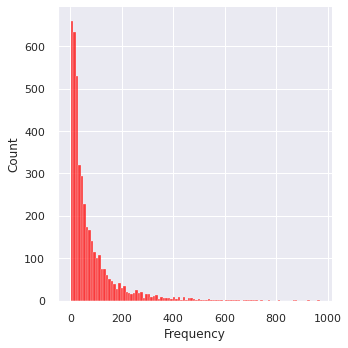

In [148]:
## Freqency Distribution Plot, taking which has observation less than 1000
x_F = rfm_df.query('Frequency<1000')['Frequency']
ax_F = sns.displot(x_F, color='Red')

In [149]:
## Descriptive analysis Monetary 
rfm_df.Monetary.describe()

count      4338.000000
mean       2043.514766
std        8981.528470
min           3.750000
25%         305.280000
50%         664.130000
75%        1650.647500
max      280206.020000
Name: Monetary, dtype: float64

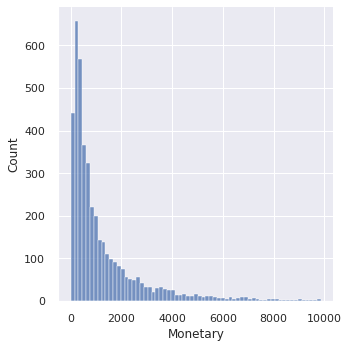

In [150]:
## Monetary Distribution Plot, taking which has observation less than 10000
x_A = rfm_df.query('Monetary<10000')['Monetary']
ax_A = sns.displot(x_A)

## Outliers

Text(0, 0.5, 'Range')

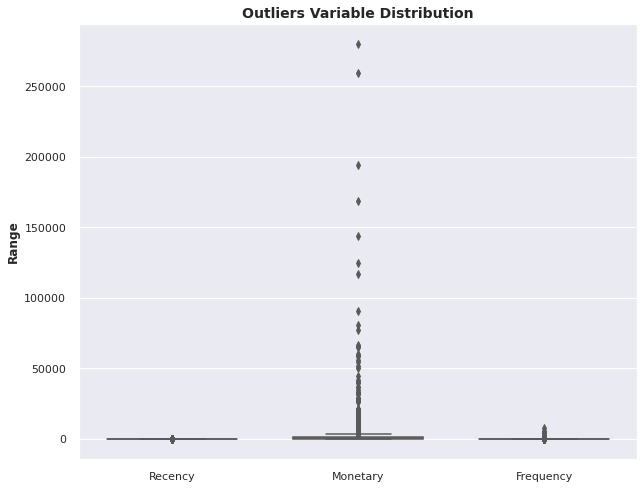

In [154]:
# Box plot of Recency
attributes =['Recency','Monetary','Frequency']

# Box plot of Monetary
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm_df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')

In [155]:
# removing (statistical) outliers
Q1 = rfm_df.Monetary.quantile(0.05)
Q3 = rfm_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Monetary >= Q1 - 1.5*IQR) & (rfm_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = rfm_df.Recency.quantile(0.05)
Q3 = rfm_df.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = rfm_df.Frequency.quantile(0.05)
Q3 = rfm_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

## Scalar Transformation

In [156]:
# Rescaling
rfm_df = rfm_df[['Monetary', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4257, 3)

In [157]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.665170,1.109892,-0.917855
1,0.270188,-0.453709,-0.189261
2,0.248154,-0.018800,-0.748182
3,-0.541921,-0.598679,2.156212
4,0.663685,0.105459,-0.578510


## Visualization of RFM model

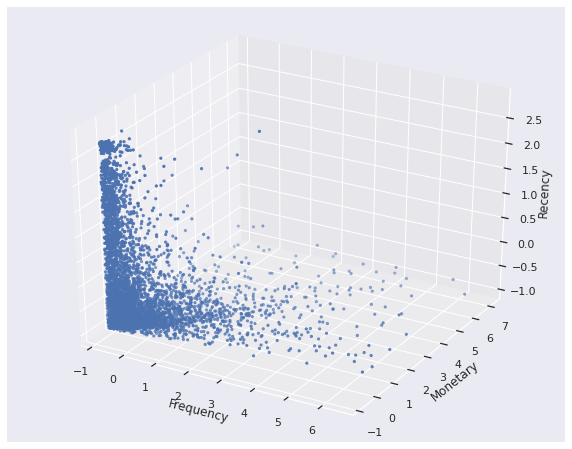

In [158]:
from mpl_toolkits.mplot3d import Axes3D

## 3D plot

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df_scaled.Frequency
ys=rfm_df_scaled.Monetary
zs=rfm_df_scaled.Recency

## set X, Y and Z labels
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')

plt.show()

We can observed that from 3D plot, people who buy with a higher frequency and more Recency tends to spend more based on the increasing trend in monetray value corresponding inceasing and decreasing trend on frequency and recency, respectively.

## Finding best value for k

**The Elbow Method**

Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

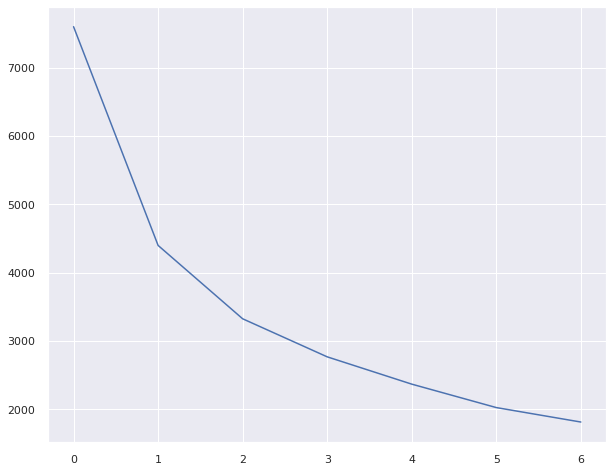

In [159]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

# Model Training

**Kmeans Algorithm**

In [160]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5453967714022041
For n_clusters=3, the silhouette score is 0.510402045095614
For n_clusters=4, the silhouette score is 0.48187815645832577
For n_clusters=5, the silhouette score is 0.46981094434641796
For n_clusters=6, the silhouette score is 0.41788519412316744
For n_clusters=7, the silhouette score is 0.4157485233725426
For n_clusters=8, the silhouette score is 0.4147075410510555


In [161]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [163]:
kmeans.labels_

array([2, 0, 0, ..., 0, 2, 0], dtype=int32)

In [165]:
# assign the label
rfm_df_scaled['cluster_id'] = kmeans.labels_
rfm_df_scaled.head()

,Monetary,Frequency,Recency,cluster_id
0,1.665170,1.109892,-0.917855,2
1,0.270188,-0.453709,-0.189261,0
2,0.248154,-0.018800,-0.748182,0
3,-0.541921,-0.598679,2.156212,1
4,0.663685,0.105459,-0.578510,0


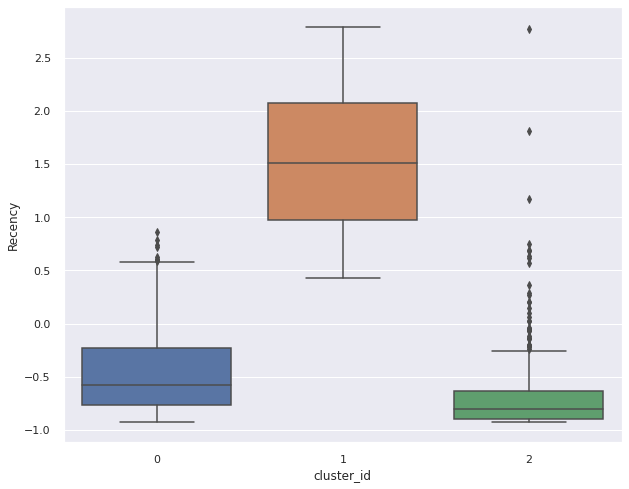

In [166]:
# plot
sns.boxplot(x='cluster_id', y='Recency', data=rfm_df_scaled)

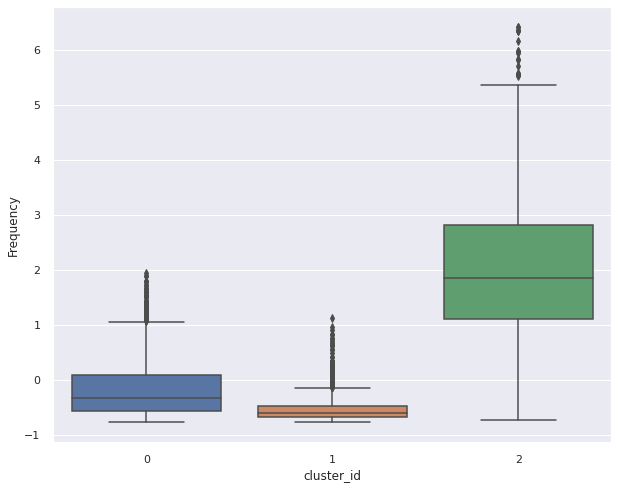

In [168]:
# plot
sns.boxplot(x='cluster_id', y='Frequency', data=rfm_df_scaled)

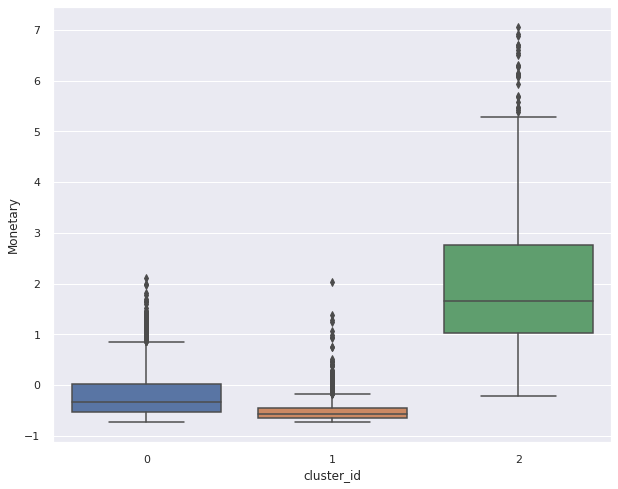

In [169]:
# plot
sns.boxplot(x='cluster_id', y='Monetary', data=rfm_df_scaled)

# Conclusion

Dataset consists of 541909 rows and contains 8 different features. Data were present from 38 different countries but United Kingdom had almost 91% of data. There were 4372 different customers data were present. From Silhouette Analysis we find the optimum value of** k =3. So,we divide customers into 3 groups. **From Kmeans clustering Algorithm we found that - Group 1 customers have very low Recency while group 2 customers have very high Recency. Also in Kmeans - Group 1 customers have high Monetary Value and Frequency. From Hierarchical clustering algorithm we came to conclusion that - Group 1 customer have high Recency rate but Group 2 customers have high Monetary and Frequency.

# Summary

This Project is implemented by group of 2 members - **Sumeet Agrawal and Shafil Ahmad**. We firstly discuss the problem statement and after that we examined the **dataset (Online Retail.xlsx)** and start discussing on the information we got from dataset. Then we decided to work individually first after that we would combine the project. 

I firstly read the dataset and try to found some insights from it. I looked for the missing values, and found that in feature 'customer ID' and 'description' have some missing values. I tried to clean the data and did EDA part. After EDA I did feature engineering and RFM. 

After doing all these I decided to go with **kmeans Algorithm**. for that firstly I found kvalue by sillhoutee Analysis and then divide all customers into k groups.